In [80]:
import pandas as pd

# Cargar el dataset para exploración
data = pd.read_csv('./travel_dataset.csv')

# Mostrar las primeras filas para entender la estructura del dataset
data.head()


,Región,País,Ciudad,Nombre,Ubicación,Tipo,Calificación,Precio,Foto URL
0,Norteamerica,Estados Unidos,New York,Times Square,"{'lat': 40.7579747, 'lng': -73.9855426}","['tourist_attraction', 'point_of_interest', 'e...",4.7,No disponible,https://maps.googleapis.com/maps/api/place/pho...
1,Norteamerica,Estados Unidos,New York,Henry Hudson Bridge,"{'lat': 40.8777134, 'lng': -73.9224308}","['tourist_attraction', 'point_of_interest', 'e...",4.2,No disponible,https://maps.googleapis.com/maps/api/place/pho...
2,Norteamerica,Estados Unidos,New York,Lincoln Center for the Performing Arts,"{'lat': 40.7724641, 'lng': -73.9834889}","['tourist_attraction', 'point_of_interest', 'e...",4.8,4,https://maps.googleapis.com/maps/api/place/pho...
3,Norteamerica,Estados Unidos,New York,Radio City Music Hall,"{'lat': 40.75997599999999, 'lng': -73.9799772}","['tourist_attraction', 'point_of_interest', 'e...",4.8,No disponible,https://maps.googleapis.com/maps/api/place/pho...
4,Norteamerica,Estados Unidos,New York,Rockefeller Center,"{'lat': 40.7587402, 'lng': -73.9786736}","['tourist_attraction', 'point_of_interest', 'e...",4.7,No disponible,https://maps.googleapis.com/maps/api/place/pho...


In [81]:
# Resumen inicial de los datos para verificar tipos y valores faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5022 entries, 0 to 5021
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Región        5022 non-null   object
 1   País          5022 non-null   object
 2   Ciudad        5022 non-null   object
 3   Nombre        5022 non-null   object
 4   Ubicación     5022 non-null   object
 5   Tipo          5022 non-null   object
 6   Calificación  5022 non-null   object
 7   Precio        5022 non-null   object
 8   Foto URL      5022 non-null   object
dtypes: object(9)
memory usage: 353.2+ KB


In [82]:
# Verificar los valores únicos en las columnas clave para entender su distribución
categorical_overview = {
    "Región": data["Región"].unique(),
    "País": data["País"].unique(),
    "Ciudad": data["Ciudad"].unique(),
    "Precio": data["Precio"].unique(),
    "Tipo": data["Tipo"].head()  # Muestra una muestra de los tipos para analizar el formato
}

In [83]:
categorical_overview

{'Región': array(['Norteamerica', 'Centroamerica', 'America Insular',
        'America del Sur', 'Europa', 'Asia', 'Africa', 'Oceania'],
       dtype=object),
 'País': array(['Estados Unidos', 'Canada', 'Mexico', 'Guatemala', 'Honduras',
        'El Salvador', 'Nicaragua', 'Costa Rica', 'Cuba', 'Puerto Rico',
        'Jamaica', 'Barbados', 'Argentina', 'Chile', 'Colombia', 'Ecuador',
        'Uruguay', 'Paraguay', 'Venezuela', 'Bolivia', 'Portugal',
        'Francia', 'España', 'Italia', 'Alemania', 'Reino Unido',
        'Paises Bajos', 'Grecia', 'Rusia', 'Suiza', 'Japón',
        'Corea del Sur', 'Tailandia', 'Nigeria', 'Tanzania', 'Madagascar',
        'Australia'], dtype=object),
 'Ciudad': array(['New York', 'New Jersey', 'California', 'Illinois', 'Texas',
        'Florida', 'Nevada', 'District of Columbia', 'Maryland',
        'Virginia', 'Washington', 'Massachusetts', 'Ontario', 'Québec',
        'British Columbia', 'Quebec', 'Alberta', 'Manitoba', 'Nova Scotia',
        'Ciudad

In [84]:
import ast

# Extraer latitud y longitud de la columna Ubicación
data['lat'] = data['Ubicación'].apply(lambda x: ast.literal_eval(x).get('lat', None))
data['lng'] = data['Ubicación'].apply(lambda x: ast.literal_eval(x).get('lng', None))

In [85]:
# Convertir la columna Calificación a valores numéricos
data['Calificación'] = pd.to_numeric(data['Calificación'], errors='coerce')

# Inspeccionar los cambios realizados
data[['lat', 'lng', 'Calificación']].head()

,lat,lng,Calificación
0,40.757975,-73.985543,4.7
1,40.877713,-73.922431,4.2
2,40.772464,-73.983489,4.8
3,40.759976,-73.979977,4.8
4,40.758740,-73.978674,4.7


In [86]:
price_mapping = {'No disponible': None, '0': 0, '1': 1, '2': 2, '3': 3, '4': 4}
data['Precio'] = data['Precio'].map(price_mapping)

In [87]:
# Verificar los primeros valores tras el mapeo
data[['Precio']].head()

,Precio
0,NaN
1,NaN
2,4.0
3,NaN
4,NaN


In [88]:
data

,Región,País,Ciudad,Nombre,Ubicación,Tipo,Calificación,Precio,Foto URL,lat,lng
0,Norteamerica,Estados Unidos,New York,Times Square,"{'lat': 40.7579747, 'lng': -73.9855426}","['tourist_attraction', 'point_of_interest', 'e...",4.7,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.757975,-73.985543
1,Norteamerica,Estados Unidos,New York,Henry Hudson Bridge,"{'lat': 40.8777134, 'lng': -73.9224308}","['tourist_attraction', 'point_of_interest', 'e...",4.2,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.877713,-73.922431
2,Norteamerica,Estados Unidos,New York,Lincoln Center for the Performing Arts,"{'lat': 40.7724641, 'lng': -73.9834889}","['tourist_attraction', 'point_of_interest', 'e...",4.8,4.0,https://maps.googleapis.com/maps/api/place/pho...,40.772464,-73.983489
3,Norteamerica,Estados Unidos,New York,Radio City Music Hall,"{'lat': 40.75997599999999, 'lng': -73.9799772}","['tourist_attraction', 'point_of_interest', 'e...",4.8,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.759976,-73.979977
4,Norteamerica,Estados Unidos,New York,Rockefeller Center,"{'lat': 40.7587402, 'lng': -73.9786736}","['tourist_attraction', 'point_of_interest', 'e...",4.7,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.758740,-73.978674
...,...,...,...,...,...,...,...,...,...,...,...
5017,Oceania,Australia,Victoria,Melbourne River Cruises,"{'lat': -37.8199185, 'lng': 144.965806}","['tourist_attraction', 'travel_agency', 'point...",4.4,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.819918,144.965806
5018,Oceania,Australia,Victoria,Kings Park,"{'lat': -37.8957674, 'lng': 145.3012172}","['park', 'tourist_attraction', 'point_of_inter...",4.3,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.895767,145.301217
5019,Oceania,Australia,Victoria,Funfields Themepark,"{'lat': -37.51999429999999, 'lng': 145.111246}","['tourist_attraction', 'amusement_park', 'poin...",4.4,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.519994,145.111246
5020,Oceania,Australia,Victoria,Diamond Valley Railway Inc.,"{'lat': -37.7335989, 'lng': 145.1419345}","['tourist_attraction', 'point_of_interest', 'e...",4.8,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.733599,145.141934


In [89]:
# Lista de columnas a eliminar
columns_to_drop = ['Ubicación']

# Eliminar columnas del DataFrame
data_cleaned = data.drop(columns=columns_to_drop)

# Verificar las columnas restantes
print(data_cleaned.columns)

Index(['Región', 'País', 'Ciudad', 'Nombre', 'Tipo', 'Calificación', 'Precio',
       'Foto URL', 'lat', 'lng'],
      dtype='object')


In [90]:
data_cleaned

,Región,País,Ciudad,Nombre,Tipo,Calificación,Precio,Foto URL,lat,lng
0,Norteamerica,Estados Unidos,New York,Times Square,"['tourist_attraction', 'point_of_interest', 'e...",4.7,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.757975,-73.985543
1,Norteamerica,Estados Unidos,New York,Henry Hudson Bridge,"['tourist_attraction', 'point_of_interest', 'e...",4.2,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.877713,-73.922431
2,Norteamerica,Estados Unidos,New York,Lincoln Center for the Performing Arts,"['tourist_attraction', 'point_of_interest', 'e...",4.8,4.0,https://maps.googleapis.com/maps/api/place/pho...,40.772464,-73.983489
3,Norteamerica,Estados Unidos,New York,Radio City Music Hall,"['tourist_attraction', 'point_of_interest', 'e...",4.8,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.759976,-73.979977
4,Norteamerica,Estados Unidos,New York,Rockefeller Center,"['tourist_attraction', 'point_of_interest', 'e...",4.7,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.758740,-73.978674
...,...,...,...,...,...,...,...,...,...,...
5017,Oceania,Australia,Victoria,Melbourne River Cruises,"['tourist_attraction', 'travel_agency', 'point...",4.4,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.819918,144.965806
5018,Oceania,Australia,Victoria,Kings Park,"['park', 'tourist_attraction', 'point_of_inter...",4.3,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.895767,145.301217
5019,Oceania,Australia,Victoria,Funfields Themepark,"['tourist_attraction', 'amusement_park', 'poin...",4.4,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.519994,145.111246
5020,Oceania,Australia,Victoria,Diamond Valley Railway Inc.,"['tourist_attraction', 'point_of_interest', 'e...",4.8,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.733599,145.141934


In [91]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5022 entries, 0 to 5021
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Región        5022 non-null   object 
 1   País          5022 non-null   object 
 2   Ciudad        5022 non-null   object 
 3   Nombre        5022 non-null   object 
 4   Tipo          5022 non-null   object 
 5   Calificación  4453 non-null   float64
 6   Precio        111 non-null    float64
 7   Foto URL      5022 non-null   object 
 8   lat           5022 non-null   float64
 9   lng           5022 non-null   float64
dtypes: float64(4), object(6)
memory usage: 392.5+ KB


In [92]:
import ast

# Convertir las cadenas de texto a listas reales
data_cleaned['Tipo_list'] = data_cleaned['Tipo'].apply(lambda x: ast.literal_eval(x))

# Crear un conjunto de todos los tipos únicos
unique_types = set()
data_cleaned['Tipo_list'].apply(unique_types.update)

# Contar el número de tipos únicos
len(unique_types), unique_types

(76,
 {'airport',
  'amusement_park',
  'aquarium',
  'art_gallery',
  'bakery',
  'bank',
  'bar',
  'beach',
  'bicycle_store',
  'book_store',
  'bowling_alley',
  'cafe',
  'campground',
  'car_rental',
  'car_repair',
  'casino',
  'cemetery',
  'church',
  'city_hall',
  'clothing_store',
  'courthouse',
  'department_store',
  'embassy',
  'establishment',
  'finance',
  'fire_station',
  'food',
  'funeral_home',
  'furniture_store',
  'general_contractor',
  'grocery_or_supermarket',
  'gym',
  'health',
  'hindu_temple',
  'historical_place',
  'home_goods_store',
  'jewelry_store',
  'landmark',
  'lawyer',
  'library',
  'liquor_store',
  'local_government_office',
  'lodging',
  'market',
  'meal_delivery',
  'meal_takeaway',
  'mosque',
  'movie_rental',
  'movie_theater',
  'museum',
  'natural_feature',
  'night_club',
  'painter',
  'park',
  'parking',
  'pharmacy',
  'place_of_worship',
  'point_of_interest',
  'post_office',
  'real_estate_agency',
  'religious_site

In [93]:
type_to_category = {
    'natural_feature': ['Relajación'],
    'bowling_alley': ['Aventura'],
    'art_gallery': ['Cultural'],
    'zoo': ['Aventura'],
    'travel_agency': [],
    'car_rental': [],
    'religious_site': ['Espiritual'],
    'church': ['Espiritual'],
    'temple': ['Espiritual'],
    'historical_place': ['Histórico'],
    'shopping_mall': ['Entretenimiento'],
    'stadium': ['Aventura'],
    'bakery': ['Gastronómico'],
    'mosque': ['Espiritual'],
    'museum': ['Cultural'],
    'restaurant': ['Gastronómico'],
    'campground': ['Relajación', 'Aventura'],
    'beach': ['Relajación'],
    'park': ['Relajación'],
    'cafe': ['Gastronómico'],
    'bar': ['Gastronómico'],
    'casino': ['Entretenimiento'],
    'amusement_park': ['Aventura'],
    'library': ['Cultural'],
    'landmark': ['Cultural'],
    'aquarium': ['Aventura'],
    'night_club': ['Entretenimiento'],
    'parking': ['Entretenimiento'],
    'lodging': ['Relajación'],
    'point_of_interest': ['Cultural'],
    'establishment': ['Cultural'],
    'store': ['Relajación'],
    'food': ['Gastronómico'],
    'tourist_attraction': ['Cultural']
    # Continúa el mapeo según sea necesario
}

In [94]:
# Crear columnas para las categorías principales inicializadas en 0
categories = ['Relajación', 'Aventura', 'Cultural', 'Histórico', 'Espiritual', 'Gastronómico', 'Entretenimiento']
for category in categories:
    data_cleaned[category] = 0

In [95]:
# Asignar 1 a las categorías correspondientes
for index, row in data_cleaned.iterrows():
    for tipo in row['Tipo_list']:
        if tipo in type_to_category:
            for category in type_to_category[tipo]:
                data_cleaned.at[index, category] = 1

In [96]:
data_cleaned

,Región,País,Ciudad,Nombre,Tipo,Calificación,Precio,Foto URL,lat,lng,Tipo_list,Relajación,Aventura,Cultural,Histórico,Espiritual,Gastronómico,Entretenimiento
0,Norteamerica,Estados Unidos,New York,Times Square,"['tourist_attraction', 'point_of_interest', 'e...",4.7,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.757975,-73.985543,"[tourist_attraction, point_of_interest, establ...",0,0,1,0,0,0,0
1,Norteamerica,Estados Unidos,New York,Henry Hudson Bridge,"['tourist_attraction', 'point_of_interest', 'e...",4.2,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.877713,-73.922431,"[tourist_attraction, point_of_interest, establ...",0,0,1,0,0,0,0
2,Norteamerica,Estados Unidos,New York,Lincoln Center for the Performing Arts,"['tourist_attraction', 'point_of_interest', 'e...",4.8,4.0,https://maps.googleapis.com/maps/api/place/pho...,40.772464,-73.983489,"[tourist_attraction, point_of_interest, establ...",0,0,1,0,0,0,0
3,Norteamerica,Estados Unidos,New York,Radio City Music Hall,"['tourist_attraction', 'point_of_interest', 'e...",4.8,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.759976,-73.979977,"[tourist_attraction, point_of_interest, establ...",0,0,1,0,0,0,0
4,Norteamerica,Estados Unidos,New York,Rockefeller Center,"['tourist_attraction', 'point_of_interest', 'e...",4.7,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.758740,-73.978674,"[tourist_attraction, point_of_interest, establ...",0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,Oceania,Australia,Victoria,Melbourne River Cruises,"['tourist_attraction', 'travel_agency', 'point...",4.4,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.819918,144.965806,"[tourist_attraction, travel_agency, point_of_i...",0,0,1,0,0,0,0
5018,Oceania,Australia,Victoria,Kings Park,"['park', 'tourist_attraction', 'point_of_inter...",4.3,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.895767,145.301217,"[park, tourist_attraction, point_of_interest, ...",1,0,1,0,0,0,0
5019,Oceania,Australia,Victoria,Funfields Themepark,"['tourist_attraction', 'amusement_park', 'poin...",4.4,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.519994,145.111246,"[tourist_attraction, amusement_park, point_of_...",0,1,1,0,0,0,0
5020,Oceania,Australia,Victoria,Diamond Valley Railway Inc.,"['tourist_attraction', 'point_of_interest', 'e...",4.8,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.733599,145.141934,"[tourist_attraction, point_of_interest, establ...",0,0,1,0,0,0,0


In [97]:
data_cleaned2 = data_cleaned.drop(columns=['Tipo', 'Tipo_list'])

In [98]:
data_cleaned2

,Región,País,Ciudad,Nombre,Calificación,Precio,Foto URL,lat,lng,Relajación,Aventura,Cultural,Histórico,Espiritual,Gastronómico,Entretenimiento
0,Norteamerica,Estados Unidos,New York,Times Square,4.7,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.757975,-73.985543,0,0,1,0,0,0,0
1,Norteamerica,Estados Unidos,New York,Henry Hudson Bridge,4.2,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.877713,-73.922431,0,0,1,0,0,0,0
2,Norteamerica,Estados Unidos,New York,Lincoln Center for the Performing Arts,4.8,4.0,https://maps.googleapis.com/maps/api/place/pho...,40.772464,-73.983489,0,0,1,0,0,0,0
3,Norteamerica,Estados Unidos,New York,Radio City Music Hall,4.8,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.759976,-73.979977,0,0,1,0,0,0,0
4,Norteamerica,Estados Unidos,New York,Rockefeller Center,4.7,NaN,https://maps.googleapis.com/maps/api/place/pho...,40.758740,-73.978674,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,Oceania,Australia,Victoria,Melbourne River Cruises,4.4,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.819918,144.965806,0,0,1,0,0,0,0
5018,Oceania,Australia,Victoria,Kings Park,4.3,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.895767,145.301217,1,0,1,0,0,0,0
5019,Oceania,Australia,Victoria,Funfields Themepark,4.4,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.519994,145.111246,0,1,1,0,0,0,0
5020,Oceania,Australia,Victoria,Diamond Valley Railway Inc.,4.8,NaN,https://maps.googleapis.com/maps/api/place/pho...,-37.733599,145.141934,0,0,1,0,0,0,0


In [99]:
# Paso 1: Calcular métricas adicionales
# Contar la cantidad de veces que aparece cada ciudad
data_cleaned2['Ciudad_Count'] = data_cleaned2.groupby('Ciudad')['Ciudad'].transform('count')

# Llenar valores faltantes en la columna "Calificación" con la media
if 'Calificación' in data_cleaned2.columns:
    data_cleaned2['Calificación'].fillna(data_cleaned2['Calificación'].mean(), inplace=True)

C:\Users\easl2\AppData\Local\Temp\ipykernel_10876\2481813721.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned2['Calificación'].fillna(data_cleaned2['Calificación'].mean(), inplace=True)


In [100]:
data_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5022 entries, 0 to 5021
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Región           5022 non-null   object 
 1   País             5022 non-null   object 
 2   Ciudad           5022 non-null   object 
 3   Nombre           5022 non-null   object 
 4   Calificación     5022 non-null   float64
 5   Precio           111 non-null    float64
 6   Foto URL         5022 non-null   object 
 7   lat              5022 non-null   float64
 8   lng              5022 non-null   float64
 9   Relajación       5022 non-null   int64  
 10  Aventura         5022 non-null   int64  
 11  Cultural         5022 non-null   int64  
 12  Histórico        5022 non-null   int64  
 13  Espiritual       5022 non-null   int64  
 14  Gastronómico     5022 non-null   int64  
 15  Entretenimiento  5022 non-null   int64  
 16  Ciudad_Count     5022 non-null   int64  
dtypes: float64(4),

In [101]:
city_price_mapping = {
    # Económicas (75)
    "Guatemala": 75, "Managua": 75, "Escuintla": 75, "Chinandega": 75,
    "Santa Rosa": 75, "San Salvador": 75, "Morazán": 75, "Choluteca": 75,
    "Alta Verapaz": 75, "Zacapa": 75, "Santa Ana": 75, "Sonsonate": 75,
    "Jinotega": 75, "León": 75, "Granada": 75, "Rivas": 75, "Carazo": 75,
    "Boaco": 75, "Matagalpa": 75, "Usulután": 75, "San Miguel": 75,
    "La Unión": 75, "Escuintla Department": 75, "Nueva Segovia": 75,

    # Intermedias (225)
    "Ciudad de México": 225, "Bogotá": 225, "Madrid": 225, "Ontario": 225,
    "Barcelona": 225, "Washington": 225, "Massachusetts": 225, "Quito": 225,
    "Lima": 225, "Montevideo": 225, "Asunción": 225, "Buenos Aires": 225,
    "San José": 225, "Puebla": 225, "Yucatán": 225, "San Luis Potosí": 225,
    "Guadalajara": 225, "Toronto": 225, "Cali": 225, "Medellín": 225,
    "Cusco": 225, "Cartagena": 225, "Valencia": 225, "Santiago": 225,
    "Cancún": 225, "Estado de México": 225,

    # Populares/Lujosas (600)
    "New York": 600, "Paris": 600, "Rome": 600, "London": 600, "Zurich": 600,
    "Tokyo": 600, "California": 600, "Nevada": 600, "Los Ángeles": 600,
    "Florencia": 600, "Múnich": 600, "Kioto": 600, "Dubái": 600, "Venecia": 600,
    "San Francisco": 600, "Milán": 600, "Berlín": 600, "Hong Kong": 600,
    "Sydney": 600, "Singapur": 600, "Miami": 600, "Viena": 600, "Seúl": 600,
    "Amsterdam": 600, "Boston": 600, "Chicago": 600, "Las Vegas": 600
}

# Asignar un precio a todas las ciudades listadas
data_cleaned2['Precio'] = data_cleaned2['Ciudad'].map(city_price_mapping)

# Asignar un valor por defecto para ciudades no mapeadas
data_cleaned2['Precio'] = data_cleaned2['Precio'].fillna(150)  # Precio genérico para ciudades no clasificadas

# Verificar las primeras filas
print(data_cleaned2[['Ciudad', 'Precio']].head(10))

     Ciudad  Precio
0  New York   600.0
1  New York   600.0
2  New York   600.0
3  New York   600.0
4  New York   600.0
5  New York   600.0
6  New York   600.0
7  New York   600.0
8  New York   600.0
9  New York   600.0


In [102]:
data_cleaned2

,Región,País,Ciudad,Nombre,Calificación,Precio,Foto URL,lat,lng,Relajación,Aventura,Cultural,Histórico,Espiritual,Gastronómico,Entretenimiento,Ciudad_Count
0,Norteamerica,Estados Unidos,New York,Times Square,4.7,600.0,https://maps.googleapis.com/maps/api/place/pho...,40.757975,-73.985543,0,0,1,0,0,0,0,49
1,Norteamerica,Estados Unidos,New York,Henry Hudson Bridge,4.2,600.0,https://maps.googleapis.com/maps/api/place/pho...,40.877713,-73.922431,0,0,1,0,0,0,0,49
2,Norteamerica,Estados Unidos,New York,Lincoln Center for the Performing Arts,4.8,600.0,https://maps.googleapis.com/maps/api/place/pho...,40.772464,-73.983489,0,0,1,0,0,0,0,49
3,Norteamerica,Estados Unidos,New York,Radio City Music Hall,4.8,600.0,https://maps.googleapis.com/maps/api/place/pho...,40.759976,-73.979977,0,0,1,0,0,0,0,49
4,Norteamerica,Estados Unidos,New York,Rockefeller Center,4.7,600.0,https://maps.googleapis.com/maps/api/place/pho...,40.758740,-73.978674,0,0,1,0,0,0,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,Oceania,Australia,Victoria,Melbourne River Cruises,4.4,150.0,https://maps.googleapis.com/maps/api/place/pho...,-37.819918,144.965806,0,0,1,0,0,0,0,50
5018,Oceania,Australia,Victoria,Kings Park,4.3,150.0,https://maps.googleapis.com/maps/api/place/pho...,-37.895767,145.301217,1,0,1,0,0,0,0,50
5019,Oceania,Australia,Victoria,Funfields Themepark,4.4,150.0,https://maps.googleapis.com/maps/api/place/pho...,-37.519994,145.111246,0,1,1,0,0,0,0,50
5020,Oceania,Australia,Victoria,Diamond Valley Railway Inc.,4.8,150.0,https://maps.googleapis.com/maps/api/place/pho...,-37.733599,145.141934,0,0,1,0,0,0,0,50


In [103]:
from sklearn.preprocessing import OneHotEncoder

# Definir columnas categóricas
categorical_features = ['Región', 'País', 'Ciudad']

# Aplicar codificación One-Hot para las columnas categóricas
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=int)

# Asegurarse de que las columnas existan antes de codificar
if all(col in data_cleaned2.columns for col in categorical_features):
    encoded_features = onehot.fit_transform(data_cleaned2[categorical_features])

    # Obtener los nombres de las columnas codificadas
    feature_names = (
        [f"region_{cat}" for cat in onehot.categories_[0]] +
        [f"pais_{cat}" for cat in onehot.categories_[1]]+
        [f"ciudad_{cat}" for cat in onehot.categories_[2]]
    )

    # Crear un DataFrame con las columnas codificadas
    encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

    # Añadir las columnas codificadas al DataFrame original
    df = pd.concat([data_cleaned2.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
else:
    print("No se encontraron las columnas categóricas necesarias para codificación.")

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5022 entries, 0 to 5021
Columns: 338 entries, Región to ciudad_Zurich
dtypes: float64(4), int64(329), object(5)
memory usage: 13.0+ MB


In [105]:
df

,Región,País,Ciudad,Nombre,Calificación,Precio,Foto URL,lat,lng,Relajación,...,ciudad_Washington,ciudad_West End,ciudad_Westmoreland Parish,ciudad_Weston,ciudad_Yamanashi,ciudad_Yucatán,ciudad_Zacapa,ciudad_Zacapa Department,ciudad_Zulia,ciudad_Zurich
0,Norteamerica,Estados Unidos,New York,Times Square,4.7,600.0,https://maps.googleapis.com/maps/api/place/pho...,40.757975,-73.985543,0,...,0,0,0,0,0,0,0,0,0,0
1,Norteamerica,Estados Unidos,New York,Henry Hudson Bridge,4.2,600.0,https://maps.googleapis.com/maps/api/place/pho...,40.877713,-73.922431,0,...,0,0,0,0,0,0,0,0,0,0
2,Norteamerica,Estados Unidos,New York,Lincoln Center for the Performing Arts,4.8,600.0,https://maps.googleapis.com/maps/api/place/pho...,40.772464,-73.983489,0,...,0,0,0,0,0,0,0,0,0,0
3,Norteamerica,Estados Unidos,New York,Radio City Music Hall,4.8,600.0,https://maps.googleapis.com/maps/api/place/pho...,40.759976,-73.979977,0,...,0,0,0,0,0,0,0,0,0,0
4,Norteamerica,Estados Unidos,New York,Rockefeller Center,4.7,600.0,https://maps.googleapis.com/maps/api/place/pho...,40.758740,-73.978674,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,Oceania,Australia,Victoria,Melbourne River Cruises,4.4,150.0,https://maps.googleapis.com/maps/api/place/pho...,-37.819918,144.965806,0,...,0,0,0,0,0,0,0,0,0,0
5018,Oceania,Australia,Victoria,Kings Park,4.3,150.0,https://maps.googleapis.com/maps/api/place/pho...,-37.895767,145.301217,1,...,0,0,0,0,0,0,0,0,0,0
5019,Oceania,Australia,Victoria,Funfields Themepark,4.4,150.0,https://maps.googleapis.com/maps/api/place/pho...,-37.519994,145.111246,0,...,0,0,0,0,0,0,0,0,0,0
5020,Oceania,Australia,Victoria,Diamond Valley Railway Inc.,4.8,150.0,https://maps.googleapis.com/maps/api/place/pho...,-37.733599,145.141934,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df.drop(columns=['Región', 'País', 'Ciudad'], inplace=True)

In [108]:
df.drop(columns=['Foto URL'], inplace=True)

In [109]:
df

,Nombre,Calificación,Precio,lat,lng,Relajación,Aventura,Cultural,Histórico,Espiritual,...,ciudad_Washington,ciudad_West End,ciudad_Westmoreland Parish,ciudad_Weston,ciudad_Yamanashi,ciudad_Yucatán,ciudad_Zacapa,ciudad_Zacapa Department,ciudad_Zulia,ciudad_Zurich
0,Times Square,4.7,600.0,40.757975,-73.985543,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Henry Hudson Bridge,4.2,600.0,40.877713,-73.922431,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lincoln Center for the Performing Arts,4.8,600.0,40.772464,-73.983489,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Radio City Music Hall,4.8,600.0,40.759976,-73.979977,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rockefeller Center,4.7,600.0,40.758740,-73.978674,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,Melbourne River Cruises,4.4,150.0,-37.819918,144.965806,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5018,Kings Park,4.3,150.0,-37.895767,145.301217,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5019,Funfields Themepark,4.4,150.0,-37.519994,145.111246,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5020,Diamond Valley Railway Inc.,4.8,150.0,-37.733599,145.141934,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
#guardar el dataset limpio
df.to_csv('travel_dataset_cleaned_ciudad.csv', index=False)

In [111]:
X = df.drop(columns=['Nombre'])

In [112]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=8, random_state=42, n_init=10)

predicciones  = model.fit_predict(X)


In [113]:
X['Cluster'] = predicciones
X

,Calificación,Precio,lat,lng,Relajación,Aventura,Cultural,Histórico,Espiritual,Gastronómico,...,ciudad_West End,ciudad_Westmoreland Parish,ciudad_Weston,ciudad_Yamanashi,ciudad_Yucatán,ciudad_Zacapa,ciudad_Zacapa Department,ciudad_Zulia,ciudad_Zurich,Cluster
0,4.7,600.0,40.757975,-73.985543,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,4.2,600.0,40.877713,-73.922431,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,4.8,600.0,40.772464,-73.983489,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,4.8,600.0,40.759976,-73.979977,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,4.7,600.0,40.758740,-73.978674,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,4.4,150.0,-37.819918,144.965806,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
5018,4.3,150.0,-37.895767,145.301217,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
5019,4.4,150.0,-37.519994,145.111246,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
5020,4.8,150.0,-37.733599,145.141934,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7


<Axes: xlabel='lng', ylabel='lat'>

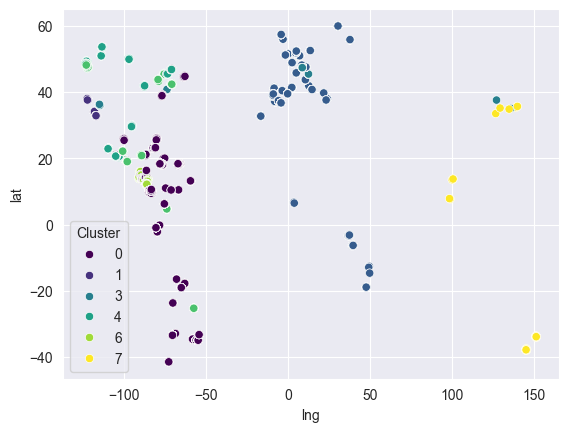

In [114]:
import seaborn as sb

sb.scatterplot(data=X, x='lng', y='lat', hue='Cluster', palette='viridis')

<Axes: xlabel='Cluster', ylabel='count'>

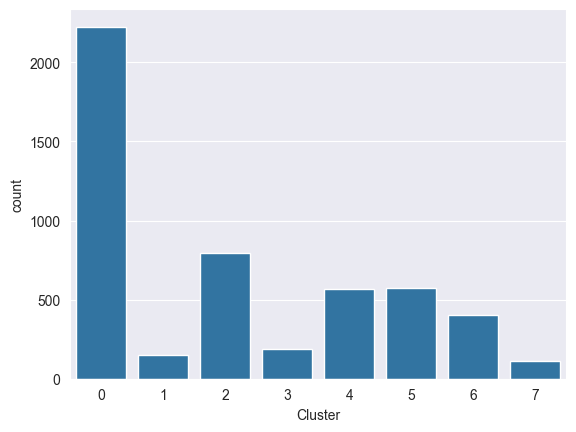

In [51]:
sb.countplot(data=X, x='Cluster')

In [115]:
X.groupby('Cluster')['Precio'].mean()

Cluster
0    150.000000
1    600.000000
2    155.667506
3    600.000000
4    150.000000
5    225.000000
6     75.000000
7    150.000000
Name: Precio, dtype: float64

In [116]:
X.groupby('Cluster')['Calificación'].mean()

Cluster
0    4.495082
1    4.581333
2    4.492915
3    4.538743
4    4.516825
5    4.512040
6    4.437264
7    4.509009
Name: Calificación, dtype: float64

In [117]:
from sklearn.preprocessing import StandardScaler

# Selección de características relevantes para el clustering
features = df[["Calificación", "Precio", "lat", "lng",
                    "Relajación", "Aventura", "Cultural", "Histórico",
                    "Espiritual", "Gastronómico", "Entretenimiento"]]

# Normalización de los datos
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Confirmar la normalización
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns)
normalized_features_df.describe()

,Calificación,Precio,lat,lng,Relajación,Aventura,Cultural,Histórico,Espiritual,Gastronómico,Entretenimiento
count,5.022000e+03,5.022000e+03,5.022000e+03,5.022000e+03,5.022000e+03,5.022000e+03,5.022000e+03,5.022000e+03,5.022000e+03,5.022000e+03,5.022000e+03
mean,-1.296012e-15,9.621049e-17,-2.263776e-17,-4.527552e-17,-1.131888e-17,-2.829720e-17,-6.847923e-16,2.829720e-18,-2.263776e-17,5.659440e-18,-5.659440e-18
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-9.452629e+00,-9.292756e-01,-2.472236e+00,-1.216419e+00,-5.187902e-01,-2.259810e-01,-2.238750e+01,-1.996012e-02,-2.699031e-01,-2.015275e-01,-1.396010e-01
25%,-2.675410e-01,-2.898973e-01,-3.409771e-01,-5.211145e-01,-5.187902e-01,-2.259810e-01,4.466779e-02,-1.996012e-02,-2.699031e-01,-2.015275e-01,-1.396010e-01
50%,2.608676e-03,-2.898973e-01,-1.257073e-02,-3.012682e-01,-5.187902e-01,-2.259810e-01,4.466779e-02,-1.996012e-02,-2.699031e-01,-2.015275e-01,-1.396010e-01
75%,5.429080e-01,-2.898973e-01,8.419111e-01,9.906725e-02,-5.187902e-01,-2.259810e-01,4.466779e-02,-1.996012e-02,-2.699031e-01,-2.015275e-01,-1.396010e-01
max,1.353357e+00,3.546373e+00,1.695626e+00,4.324922e+00,1.927561e+00,4.425152e+00,4.466779e-02,5.009990e+01,3.705033e+00,4.962101e+00,7.163274e+00


In [120]:
from sklearn.cluster import KMeans

# Definir el número de clusters
n_clusters = 8

# Inicializar KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustar el modelo a los datos normalizados
pre = kmeans.fit_predict(normalized_features)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_


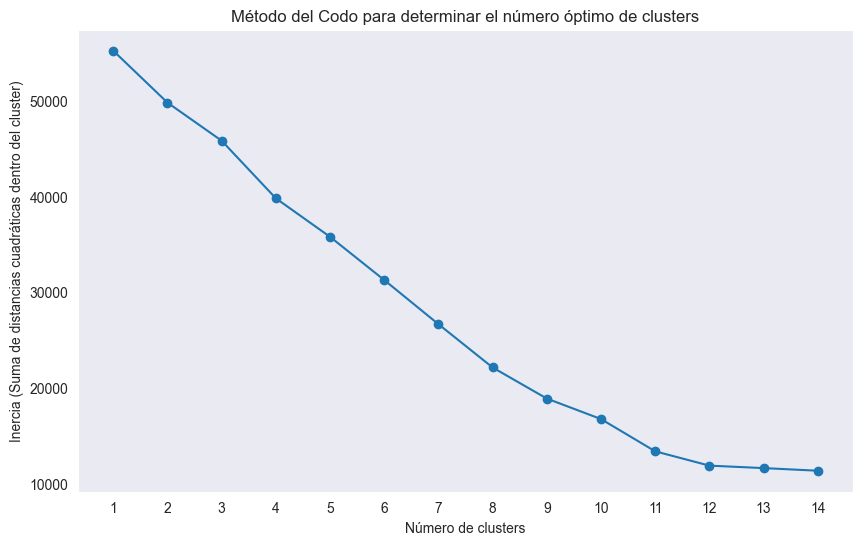

In [122]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Aplicar K-means con distintos números de clusters
inertia = []
cluster_range = range(1, 15)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Método del Codo para determinar el número óptimo de clusters")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia (Suma de distancias cuadráticas dentro del cluster)")
plt.xticks(cluster_range)
plt.grid()
plt.show()